# TinyML - Ávore de Decisão

In [1]:
!pip install micromlgen

## 1. Import as bibliotecsa

In [2]:
from micromlgen import port
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

## 2. Carrego o Dataset

O conjunto de dados Iris é um conjunto clássico na área de aprendizado de máquina e estatísticas. Ele foi introduzido por Sir Ronald A. Fisher em 1936 como um exemplo de análise discriminante. O conjunto de dados é frequentemente utilizado para fins educacionais e é um ponto de partida comum para a prática de classificação de padrões.


Atributos:

- Comprimento da sépala (em centímetros)

- Largura da sépala (em centímetros)

- Comprimento da pétala (em centímetros)

- Largura da pétala (em centímetros)

Espécies:

- 0 - Setosa

- 1 - Versicolor

- 2 - Virginica

In [3]:
X, y = load_iris(return_X_y=True)

In [4]:
print('Shape da entrada: ', X.shape)
print('Shape da variável alvo: ', y.shape)

Shape da entrada:  (150, 4)
Shape da variável alvo:  (150,)


In [5]:
print(X[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [8]:
print(y[:80])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


## 3. Separo em dados de treinamento e teste

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## 4. Crio o modelo de classificação

In [10]:
modelo = DecisionTreeClassifier(criterion = "entropy", splitter="best")

## 5. Treino o modelo

In [11]:
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

## 6. Vizualizo o modelo

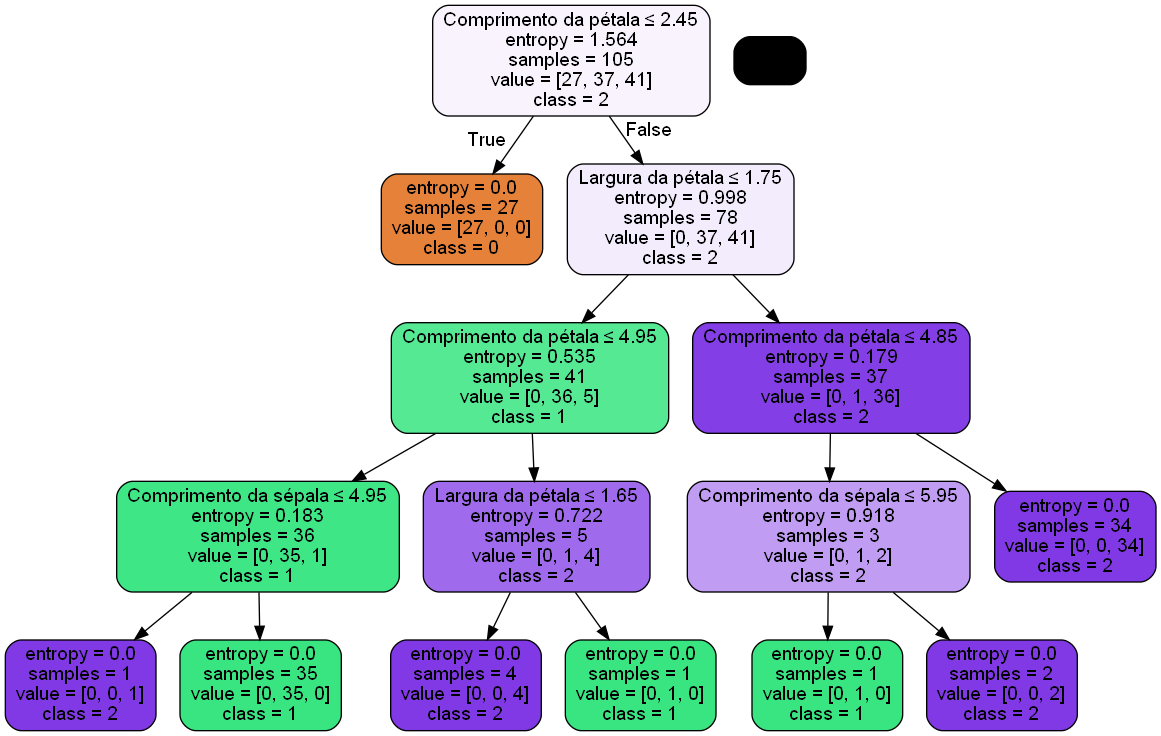

In [12]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = ["Comprimento da sépala", "Largura da sépala", "Comprimento da pétala", "Largura da pétala"]
dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore_decisao.png')
Image(graph.create_png())


## 7. Avaliação do modelo com os dados de treinamento

In [13]:
training_predict = modelo.predict(X_train)

In [14]:
print(metrics.classification_report(y_train, training_predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        27
           1      1.000     1.000     1.000        37
           2      1.000     1.000     1.000        41

    accuracy                          1.000       105
   macro avg      1.000     1.000     1.000       105
weighted avg      1.000     1.000     1.000       105



In [15]:
print(metrics.confusion_matrix(y_train, training_predict))

[[27  0  0]
 [ 0 37  0]
 [ 0  0 41]]


## 8. Avaliação do modelo com os dados de teste

In [16]:
test_predict = modelo.predict(X_test)

In [17]:
print(metrics.classification_report(y_test, test_predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        23
           1      1.000     0.846     0.917        13
           2      0.818     1.000     0.900         9

    accuracy                          0.956        45
   macro avg      0.939     0.949     0.939        45
weighted avg      0.964     0.956     0.956        45



In [18]:
print(metrics.confusion_matrix(y_test, test_predict))

[[23  0  0]
 [ 0 11  2]
 [ 0  0  9]]


## 9. Obtenção do modelo para ser implantando no microcontrolador

In [19]:
print(port(modelo))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTree {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        if (x[2] <= 2.449999988079071) {
                            return 0;
                        }

                        else {
                            if (x[3] <= 1.75) {
                                if (x[2] <= 4.950000047683716) {
                                    if (x[0] <= 4.950000047683716) {
                                        return 2;
                                    }

                                    else {
                                        return 1;
                                    }
                                }

                                else {
                                    if (x[3] <= 1.6500000357627869) {


## 10. Salvo o modelo em um arquivo .h

In [1]:
with open('decision_tree_classifier.h', 'w') as file:
    file.write(port(modelo))

NameError: name 'port' is not defined